# =============================================================

# Data cleansing and some random analysis for data in CSV file "example_data_1000_pages_scraped.csv"

### Basic questions answered in this file:

#### (Q.1) How many districts are represented on this website?
#### (Q.2) Which 10 districts have the most listings on this website?
#### (Q.3) What are the 10 most expensive, and 10 cheapest districts in terms of lease price per saleable sqft?
#### (Q.4) How much more expensive are listings with the tag "Sea view" compared to those without?

# =============================================================

# Dataframe and libraries setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
custom_columns = ['description', 'link', 'district', 'address_1', 'address_2', 'size', 'price', 'agency', 'tags', 'blank_1', 'blank_2']

In [3]:
df = pd.read_csv('./example_data_1000 pages_scraped.csv', names = custom_columns)

In [4]:
df.tail(2)

,description,link,district,address_1,address_2,size,price,agency,tags,blank_1,blank_2
14998,High-rise 2-bedroom mountain view,https://www.28hse.com/en/rent/residential/prop...,Shek Tong Tsui,Lun Fung Court,"Unit D, Mid Floor, Middle Floor",Saleable Area: 369 ft² @44.7,"Lease HKD$16,500",Joe Asia Property Agency,"['Stand-alone Building', 'Mountain view']",NaN,NaN
14999,Convenient transportation and comfortable envi...,https://www.28hse.com/en/rent/residential/prop...,Tai Wai,Festival City,"Unit Nb, High Floor, Tower 5, Phase Iii","Gross Area: 1,273 ft² @27.5\nSaleable Area: 96...","Lease HKD$35,000",Centaline Property Agency Limited,['Apartment'],NaN,NaN


# Data cleaning

## Fixing incorrect data

In [5]:
# Find listings with misplaced data that was pushed to blank_1 and blank_2

non_nan_mask = df['blank_1'].notnull()
df[non_nan_mask]

,description,link,district,address_1,address_2,size,price,agency,tags,blank_1,blank_2
807,Suite in a western-style building in the city ...,the upper floors are open and spacious,https://www.28hse.com/en/rent/residential/prop...,Kwun Tong,Cambridge Building,High Floor,Saleable Area: 100 ft² @55,"Lease HKD$5,500",Hing Yip Property,"['Studio , 1 bathrooms', 'South east', 'Wester...",NaN
973,Tenement building in the city center,2 rooms on the middle floor,https://www.28hse.com/en/rent/residential/prop...,Kwun Tong,Hong Wah Building,Full Layer,Saleable Area: 260 ft² @34.6,"Lease HKD$9,000",Hing Yip Property,['Stand-alone Building'],NaN
4736,High-rise studio fl with 56sq.ft sky balcony,1 minute direct access to MTR,https://www.28hse.com/en/rent/residential/prop...,Kennedy Town,Smithfield Terrace,"Unit C3, High Floor, Block C",Saleable Area: 236 ft² @53,"Lease HKD$12,500",Winful Property Company,"['Apartment', 'Mountain view', 'Good view', 'B...",NaN
5949,『AVA55』 One bedroom and one living room,Extra large platform,Brand new building [41 校 网],https://www.28hse.com/en/rent/residential/prop...,Kowloon City,Apartment,"Full Layer, High Floor",Saleable Area: 230 ft² @60,"Lease HKD$13,800",S’uni Property Agency Limited,['Stand-alone Building']
6406,Features among features ~ Rooftop over a thous...,super large platform,https://www.28hse.com/en/rent/residential/prop...,Hung Hom,Chatham Gate,"Unit A, High Floor, Tower 2","Saleable Area: 3,176 ft² @56.7","Lease HKD$180,000",Midland Reality,"['Apartment', 'Elegant', 'Roof top', 'Clubhous...",NaN
10247,The new clubhouse,you can make an appointment,https://www.28hse.com/en/rent/residential/prop...,Shaukeiwan,Monti,"Unit D, Mid Floor, Middle Floor",Saleable Area: 286 ft² @54.2,"Lease HKD$15,500",Ysy Housing Agency,['Luxury'],NaN
14482,Century Link - Relatively NEW 2BR,No Agency Fees,https://www.28hse.com/en/rent/residential/prop...,Tung Chung,Century Link,"Room 12, Middle Floor, Tower 2B, East Central ...",Saleable Area: 456 ft² @34.6,"Lease HKD$15,800",NaN,"['landlord', 'Apartment', 'Garden view', 'Sea ...",NaN


In [6]:
# Listings with only link column populated incorrectly
listings_to_fix = [807, 973, 4736, 6406, 10247, 14482]

# Set 'Link' value to None
for listing in listings_to_fix:    
    df.iloc[listing]['link'] = None
    
    # Shift column data 1 spot to the left
    df.iloc[listing, 1:] = df.iloc[listing, 1:].shift(-1)

In [7]:
# # Check
# df.iloc[807]

In [8]:
# # Listing with link and district column populated incorrectly
# df.iloc[5949]

In [9]:
# Remove erroneous data and shift columns 2 to the left
listings_to_fix = [5949, 10194]

# Set 'link' and 'district' value to None
for listing in listings_to_fix:    
    df.iloc[listing]['link'] = None
    
    # Shift column data 1 spot to the left
    df.iloc[listing, 1:] = df.iloc[listing, 1:].shift(-2)

In [10]:
# # Check
# df.iloc[5949]

In [11]:
# Check if issues are resolved

non_nan_mask = df['blank_1'].notnull()
df[non_nan_mask]

,description,link,district,address_1,address_2,size,price,agency,tags,blank_1,blank_2


In [12]:
# Remove blank_1 and blank_2 columns from df

In [13]:
df.drop('blank_1', axis = 1, inplace = True)
df.drop('blank_2', axis = 1, inplace = True)

## Replacing NaN values in 'tags' column with empty lists


In [14]:
df['tags'] = df['tags'].apply(lambda x: [] if pd.isna(x) else x)

## Extracting numericals from 'price' data and changing to type int

In [15]:
# Check for any wrong data in column
for k, v in df['price'].items():
    if '$' not in v:
        print(k, v)

In [16]:
# Extract numerical data from 'price', remove commas, change to type int
def extract_int(cell):
    num = int(cell.split('$')[1].replace(",", ""))
    return(num)

# Test
# extract_int("Lease HKD$15,000")

In [17]:
df['price'] = df['price'].apply(extract_int)

In [18]:
df.head(2)

,description,link,district,address_1,address_2,size,price,agency,tags
0,Kintetsu used duplex sky garden | with recharg...,https://www.28hse.com/en/rent/residential/prop...,Yuen Long,Village,"House, High Floor","Saleable Area: 1,400 ft² @10.7",15000,Leader Properties Development Limited,"['3 bedrooms , 2 bathrooms', 'Apartment', 'Vil..."
1,"*Ever Bright*causeway bay near mtr station, ne...",https://www.28hse.com/en/rent/residential/prop...,Causeway Bay,Lockhart House,"High Floor, Block A",Saleable Area: 447 ft² @41.4,18500,Ever Bright Realty Company Limited,"['2 bedrooms , 1 bathrooms', 'Apartment']"


## Splitting 'size' data into 'saleable' and 'gross'

In [19]:
# Check for any wrong data in column
for k, v in df['size'].items():
    if 'Gross' not in v and 'Saleable' not in v:
        print(k, v)

In [20]:
# Extract numerical values from df['size'], append the saleable value to s_values
# and gross values to g_values

s_values = []
g_values = []
for k, v in df['size'].items():
    if 'Gross' in v and 'Saleable' in v:
        s_values.append(int(v.split(' ')[6].replace(",", "")))
        g_values.append(v.split(' ')[2].replace(",", ""))
    
    elif 'Gross' not in v:
        s_values.append(int(v.split(' ')[2].replace(",", "")))
        g_values.append('')
        
    elif 'Saleable' not in v:
        g_values.append(int(v.split(' ')[2].replace(",", "")))
        s_values.append('')

In [21]:
df['saleable_sqft'] = s_values

In [22]:
df['gross_sqft'] = g_values

In [23]:
df.head()

,description,link,district,address_1,address_2,size,price,agency,tags,saleable_sqft,gross_sqft
0,Kintetsu used duplex sky garden | with recharg...,https://www.28hse.com/en/rent/residential/prop...,Yuen Long,Village,"House, High Floor","Saleable Area: 1,400 ft² @10.7",15000,Leader Properties Development Limited,"['3 bedrooms , 2 bathrooms', 'Apartment', 'Vil...",1400,
1,"*Ever Bright*causeway bay near mtr station, ne...",https://www.28hse.com/en/rent/residential/prop...,Causeway Bay,Lockhart House,"High Floor, Block A",Saleable Area: 447 ft² @41.4,18500,Ever Bright Realty Company Limited,"['2 bedrooms , 1 bathrooms', 'Apartment']",447,
2,"Suite for rent at Sai Yeung Choi Street South,...",https://www.28hse.com/en/rent/residential/prop...,Mong Kok,Sai Yeung Building,"Mid Floor, Middle Floor",Saleable Area: 150 ft² @56.7,8500,NaN,"['Studio , 1 bathrooms', 'landlord', 'Western ...",150,
3,"1 activity room, suitable for single aristocra...",https://www.28hse.com/en/rent/residential/prop...,Kai Tak,K. Summit,"Unit E, Low Floor, Tower 1B",Saleable Area: 287 ft² @53.3,15300,NaN,"['1 bedrooms , 1 bathrooms', 'landlord', 'Apar...",287,
4,"✪✪[Big 2 bedrooms with a large kitchen, clean ...",https://www.28hse.com/en/rent/residential/prop...,Ho Man Tin,Mantin Heights,"Mid Floor, Tower 9, Middle Floor",Saleable Area: 585 ft² @45.3,26500,Century 21 Links Properties Agency,"['2 bedrooms , 1 bathrooms', 'Apartment', 'Sta...",585,


## Add 'hkd/saleable_sqft' column

In [24]:
df['price'] = df['price'].astype(float)

In [25]:
df['saleable_sqft'] = df['saleable_sqft'].replace('', np.nan).astype(float)

In [26]:
df['hkd/saleable_sqft'] = (df['price']/df['saleable_sqft']).round(2)

In [27]:
df.head(5)

,description,link,district,address_1,address_2,size,price,agency,tags,saleable_sqft,gross_sqft,hkd/saleable_sqft
0,Kintetsu used duplex sky garden | with recharg...,https://www.28hse.com/en/rent/residential/prop...,Yuen Long,Village,"House, High Floor","Saleable Area: 1,400 ft² @10.7",15000.0,Leader Properties Development Limited,"['3 bedrooms , 2 bathrooms', 'Apartment', 'Vil...",1400.0,,10.71
1,"*Ever Bright*causeway bay near mtr station, ne...",https://www.28hse.com/en/rent/residential/prop...,Causeway Bay,Lockhart House,"High Floor, Block A",Saleable Area: 447 ft² @41.4,18500.0,Ever Bright Realty Company Limited,"['2 bedrooms , 1 bathrooms', 'Apartment']",447.0,,41.39
2,"Suite for rent at Sai Yeung Choi Street South,...",https://www.28hse.com/en/rent/residential/prop...,Mong Kok,Sai Yeung Building,"Mid Floor, Middle Floor",Saleable Area: 150 ft² @56.7,8500.0,NaN,"['Studio , 1 bathrooms', 'landlord', 'Western ...",150.0,,56.67
3,"1 activity room, suitable for single aristocra...",https://www.28hse.com/en/rent/residential/prop...,Kai Tak,K. Summit,"Unit E, Low Floor, Tower 1B",Saleable Area: 287 ft² @53.3,15300.0,NaN,"['1 bedrooms , 1 bathrooms', 'landlord', 'Apar...",287.0,,53.31
4,"✪✪[Big 2 bedrooms with a large kitchen, clean ...",https://www.28hse.com/en/rent/residential/prop...,Ho Man Tin,Mantin Heights,"Mid Floor, Tower 9, Middle Floor",Saleable Area: 585 ft² @45.3,26500.0,Century 21 Links Properties Agency,"['2 bedrooms , 1 bathrooms', 'Apartment', 'Sta...",585.0,,45.30


# Analysis

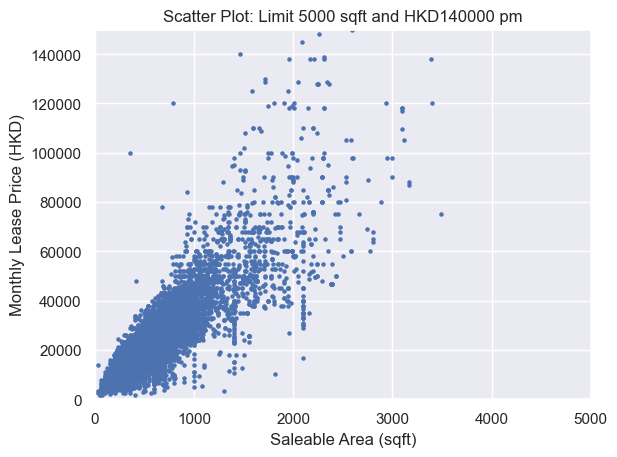

In [28]:
plt.scatter(df['saleable_sqft'], df['price'], s = 5)
plt.xlabel('Saleable Area (sqft)')
plt.ylabel('Monthly Lease Price (HKD)')
plt.title('Scatter Plot: Limit 5000 sqft and HKD140000 pm')
plt.xlim(0, 5000)
plt.ylim(0, 150000)
plt.show()

## (Q.1) How many districts are represented on this website?

In [29]:
df['district'].nunique(dropna = True) 

102

In [30]:
print(df['district'].unique())

['Yuen Long' 'Causeway Bay' 'Mong Kok' 'Kai Tak' 'Ho Man Tin' 'Ma Wan'
 'Nam Cheong' 'Hung Hom' 'Tsuen Wan' 'To Kwa Wan' 'Shaukeiwan'
 'Quarry Bay' 'Tsing Yi' 'Tai Wai' 'Tsim Sha Tsui' 'North Point'
 'Sham Shui Po' 'Wan Chai' 'Kowloon Bay' 'Sheung Wan' 'Taikoo Shing'
 'Tuen Mun Castle Peak Road' 'Tin Shui Wai' 'Tung Chung' 'Tai Po'
 'Hung Shui Kiu' 'Lohas Park District' 'Ma On Shan' 'Yau Tong'
 'Kowloon Tong' 'Jordan' 'Tai Kok Tsui' 'Kennedy Town' 'Prince Edward'
 'Sai Ying Pun' 'Central' 'Happy Valley' 'Western Mid-levels' 'Fotan'
 'Shatin' 'Kwai Chung' 'Kwai Fong' 'Yau Ma Tei' 'Tuen Mun'
 'Cheung Sha Wan' 'Tseung Kwan O' 'Kowloon Station' 'Sheung Shui'
 'Mei Foo' 'Baguio Villa' 'Lam Tin' 'Fanling' 'Tin Hau' 'Fortress Hill'
 'South Horizons' 'Kwun Tong' 'South Lantau Island' 'Sai Wan Ho'
 'San Po Kong' 'Tsuen Wan Sham Tseng' 'Sai Kung' 'Southern District'
 'Kowloon City' 'North Point Mid' 'Olympic' 'Siu Sai Wan'
 'Clear Water Bay' 'Shek Tong Tsui' 'Aberdeen' 'Mid-levels Central'
 'Wha

### (A.1) There are 102 unique districts represented on this website

## (Q.2) Which 10 districts have the most listings on this website?

In [31]:
top_10_districts = df['district'].value_counts().head(10)

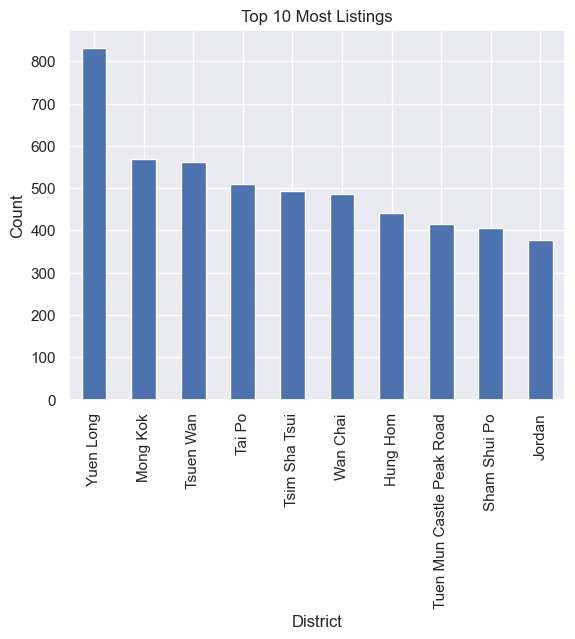

In [32]:
top_10_districts.plot.bar()
plt.xlabel('District')
plt.ylabel('Count')
plt.title('Top 10 Most Listings')
plt.show()

In [33]:
print(top_10_districts)

Yuen Long                    833
Mong Kok                     569
Tsuen Wan                    561
Tai Po                       511
Tsim Sha Tsui                494
Wan Chai                     486
Hung Hom                     442
Tuen Mun Castle Peak Road    415
Sham Shui Po                 405
Jordan                       378
Name: district, dtype: int64


In [34]:
for k, v in top_10_districts.items():
    percentage = round(v / 15000 * 100, 2)
    print(f"{k}: {percentage}% ")

Yuen Long: 5.55% 
Mong Kok: 3.79% 
Tsuen Wan: 3.74% 
Tai Po: 3.41% 
Tsim Sha Tsui: 3.29% 
Wan Chai: 3.24% 
Hung Hom: 2.95% 
Tuen Mun Castle Peak Road: 2.77% 
Sham Shui Po: 2.7% 
Jordan: 2.52% 


### (A.2) The top 10 districts are as seen above

## (Q.3) What are the 10 most expensive, and 10 cheapest districts in terms of price per saleable sqft?

In [35]:
# Top 10 most expensive
columns_to_sum = ['hkd/saleable_sqft']
most_expensive = df.groupby('district')[columns_to_sum].mean().sort_values(by = 'hkd/saleable_sqft', ascending = False).head(10)

# Top 10 cheapest
columns_to_sum = ['hkd/saleable_sqft']
cheapest = df.groupby('district')[columns_to_sum].mean().sort_values(by = 'hkd/saleable_sqft', ascending = True).head(10)

### Most expensive 10 districts

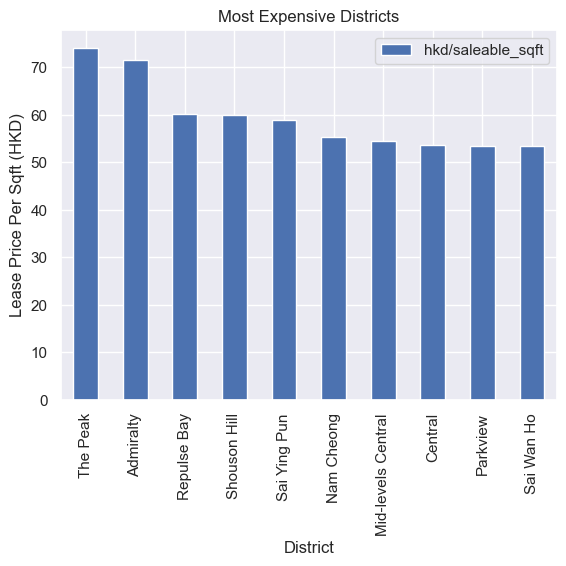

In [36]:
most_expensive.plot.bar()
plt.xlabel('District')
plt.ylabel('Lease Price Per Sqft (HKD)')
plt.title('Most Expensive Districts')
plt.show()

In [37]:
print(most_expensive)

                    hkd/saleable_sqft
district                             
The Peak                    74.135000
Admiralty                   71.540000
Repulse Bay                 60.090000
Shouson Hill                60.020000
Sai Ying Pun                58.842597
Nam Cheong                  55.248571
Mid-levels Central          54.477368
Central                     53.662727
Parkview                    53.480000
Sai Wan Ho                  53.475922


### Cheapest 10 districts

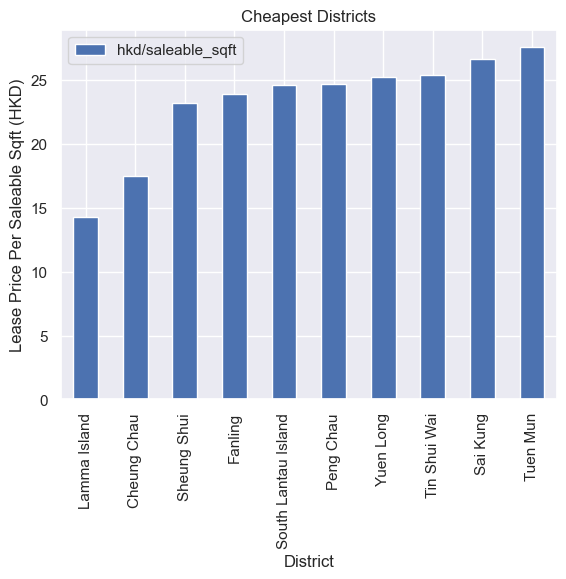

In [38]:
cheapest.plot.bar()
plt.xlabel('District')
plt.ylabel('Lease Price Per Saleable Sqft (HKD)')
plt.title('Cheapest Districts')
plt.show()

In [39]:
print(cheapest)

                     hkd/saleable_sqft
district                              
Lamma Island                 14.285000
Cheung Chau                  17.455000
Sheung Shui                  23.224514
Fanling                      23.926793
South Lantau Island          24.639375
Peng Chau                    24.674000
Yuen Long                    25.271872
Tin Shui Wai                 25.366780
Sai Kung                     26.669808
Tuen Mun                     27.566045


### (A.3) The most expensive and cheapest districts can be seen above

## (Q.4) How much more expensive are listings with the tag "Sea view" compared to those without?

In [40]:
df.head()

,description,link,district,address_1,address_2,size,price,agency,tags,saleable_sqft,gross_sqft,hkd/saleable_sqft
0,Kintetsu used duplex sky garden | with recharg...,https://www.28hse.com/en/rent/residential/prop...,Yuen Long,Village,"House, High Floor","Saleable Area: 1,400 ft² @10.7",15000.0,Leader Properties Development Limited,"['3 bedrooms , 2 bathrooms', 'Apartment', 'Vil...",1400.0,,10.71
1,"*Ever Bright*causeway bay near mtr station, ne...",https://www.28hse.com/en/rent/residential/prop...,Causeway Bay,Lockhart House,"High Floor, Block A",Saleable Area: 447 ft² @41.4,18500.0,Ever Bright Realty Company Limited,"['2 bedrooms , 1 bathrooms', 'Apartment']",447.0,,41.39
2,"Suite for rent at Sai Yeung Choi Street South,...",https://www.28hse.com/en/rent/residential/prop...,Mong Kok,Sai Yeung Building,"Mid Floor, Middle Floor",Saleable Area: 150 ft² @56.7,8500.0,NaN,"['Studio , 1 bathrooms', 'landlord', 'Western ...",150.0,,56.67
3,"1 activity room, suitable for single aristocra...",https://www.28hse.com/en/rent/residential/prop...,Kai Tak,K. Summit,"Unit E, Low Floor, Tower 1B",Saleable Area: 287 ft² @53.3,15300.0,NaN,"['1 bedrooms , 1 bathrooms', 'landlord', 'Apar...",287.0,,53.31
4,"✪✪[Big 2 bedrooms with a large kitchen, clean ...",https://www.28hse.com/en/rent/residential/prop...,Ho Man Tin,Mantin Heights,"Mid Floor, Tower 9, Middle Floor",Saleable Area: 585 ft² @45.3,26500.0,Century 21 Links Properties Agency,"['2 bedrooms , 1 bathrooms', 'Apartment', 'Sta...",585.0,,45.30


In [41]:
sea_view_mask = (df['tags'].str.contains('Sea view'))
sea_view_df = df[sea_view_mask]

In [42]:
sea_view_df.head(2)

,description,link,district,address_1,address_2,size,price,agency,tags,saleable_sqft,gross_sqft,hkd/saleable_sqft
5,2 bedrooms fully seaview and pool view,https://www.28hse.com/en/rent/residential/prop...,Ma Wan,Park Island,"Mid Floor, Block 7, Phase 2, Middle Floor",Saleable Area: 583 ft² @29.2,17000.0,Hong Kong Property,"['2 bedrooms , 1 bathrooms', 'South east', 'Ap...",583.0,,29.16
6,3 bedrooms with balcony deco renew,https://www.28hse.com/en/rent/residential/prop...,Ma Wan,Park Island,"Unit A, High Floor, Block 23, Phase 3",Saleable Area: 607 ft² @29.7,18000.0,Hong Kong Property,"['3 bedrooms , 1 bathrooms', 'North west', 'Ap...",607.0,,29.65


In [43]:
non_sea_view_mask = (~df['tags'].str.contains('Sea view'))
non_sea_view_df = df[non_sea_view_mask]

In [44]:
non_sea_view_df.head(2)

,description,link,district,address_1,address_2,size,price,agency,tags,saleable_sqft,gross_sqft,hkd/saleable_sqft
0,Kintetsu used duplex sky garden | with recharg...,https://www.28hse.com/en/rent/residential/prop...,Yuen Long,Village,"House, High Floor","Saleable Area: 1,400 ft² @10.7",15000.0,Leader Properties Development Limited,"['3 bedrooms , 2 bathrooms', 'Apartment', 'Vil...",1400.0,,10.71
1,"*Ever Bright*causeway bay near mtr station, ne...",https://www.28hse.com/en/rent/residential/prop...,Causeway Bay,Lockhart House,"High Floor, Block A",Saleable Area: 447 ft² @41.4,18500.0,Ever Bright Realty Company Limited,"['2 bedrooms , 1 bathrooms', 'Apartment']",447.0,,41.39


In [45]:
sea_view_df['hkd/saleable_sqft'].mean()

42.4811131059246

In [46]:
non_sea_view_df['hkd/saleable_sqft'].mean()

40.388710030490195

In [47]:
(42.48-40.39)/40.39

0.05174548155484021

### (A.4) Listings with the "Sea view" tag are on average HKD 42.48 / sqft vs HKD 40.39 /sqft for those without. Thus, in this dataset, they are only 5.2% more expensive.